<a href="https://colab.research.google.com/github/camilopinoh/yolov8/blob/main/entrenar_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Dec  2 00:28:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

DATASET

https://universe.roboflow.com/data6000/brand-logo-recognition-object-detection/dataset/4#

GITHUB YOLO

https://github.com/ultralytics/ultralytics

El dataset si bien esta en la plataforma oficial roboflow de yolo, el directorio se debe de cambiar, primero va la carpeta "data" que contiene

In [2]:
#Conectar con google drive para el dataset guardado

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Definit el directorio raiz
#El directorio del dataset con yolov8 despues de tener las etiquetas es el siguiente:
#data
#images/train | images/val
#labels/train | labels/val

ROOT_DIR = '/content/gdrive/My Drive/yolov8'

In [4]:
#Instalar libreria ultralytics para usar modelo yolo

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 13.1 MB/s eta 0:00:00


In [5]:
#Entrenar el modelo con el dataset de marcas

import os
from ultralytics import YOLO

# Cargar modelo (Se descarga solo, se puede elegir entre 5 que vienen en YOLO)
#yolov8n.pt
#yolov8s.pt
#yolov8m.pt
#yolov8l.pt
#yolov8x.pt
model = YOLO("yolov8l.pt")

# Se entrena el modelo configurando la ruta, el archivo yaml que tiene las rutas y el nombre de las etiquetas, los epochs y el tamaño de la imagen
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=50, imgsz=800, plots=True)

100%|██████████| 83.7M/83.7M [00:00<00:00, 232MB/s]


Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/gdrive/My Drive/yolov8/google_colab_config.yaml, epochs=250, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 62.1MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 200MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/My Drive/yolov8/data/labels/train.cache... 352 images, 0 backgrounds, 0 corrupt: 100%|██████████| 352/352 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/My Drive/yolov8/data/labels/val.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      10.6G      1.787      4.127      2.004         44        640: 100%|██████████| 22/22 [00:35<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]

                   all        100        137      0.254     0.0656     0.0464     0.0225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250        11G      1.883      3.387       1.93         37        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        100        137   0.000139     0.0196    5.7e-05   8.69e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250        11G      2.098      3.455       2.12         27        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        100        137    0.00109      0.068   0.000757   0.000197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      10.9G      2.117      3.447      2.151         28        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        100        137    0.00109      0.068   0.000757   0.000197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      10.9G      2.168      3.525      2.245         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        100        137    0.00109      0.068   0.000757   0.000197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250        11G      2.086      3.365      2.204         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        100        137   0.000108     0.0457   7.89e-05   1.48e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      10.9G      2.119      3.196       2.24         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        100        137   0.000158     0.0591   9.16e-05   3.47e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250        11G      2.123      3.218      2.222         36        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        100        137     0.0603     0.0304     0.0139    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      10.9G      2.054      3.045      2.114         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        100        137   0.000305     0.0858    0.00018    5.7e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250        11G      2.013      3.062      2.056         26        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        100        137     0.0709      0.279     0.0249    0.00846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      10.9G      1.976      2.849      2.014         36        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        100        137     0.0515      0.149     0.0207    0.00529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250        11G      1.966      2.951      2.005         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.323      0.275      0.112     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      10.9G      1.966      2.885       2.04         30        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        100        137     0.0883      0.184     0.0515     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250        11G      1.956      2.833      2.043         30        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        100        137      0.122      0.161     0.0991     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      10.9G      1.926      2.667      1.998         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.111      0.177     0.0617     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250        11G      1.974       2.71      2.028         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        100        137      0.359      0.152      0.115     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      10.9G      1.908      2.804      2.026         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        100        137      0.166      0.391       0.16     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250        11G      1.868      2.669      2.005         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        100        137      0.231      0.248      0.196     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      10.9G      1.912      2.612      1.981         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        100        137      0.308      0.193      0.178     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250        11G      1.927      2.549       2.01         24        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        100        137      0.171      0.275      0.153     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      10.9G      1.844      2.569       1.94         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


                   all        100        137      0.224      0.212      0.162     0.0712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250        11G       1.86      2.464      1.961         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.244       0.24       0.18     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      10.9G      1.825      2.498      1.952         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        100        137      0.302      0.202      0.191     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250        11G      1.843      2.476      1.956         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


                   all        100        137      0.322      0.239      0.229     0.0979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      10.9G      1.793      2.506      1.911         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137       0.24      0.279      0.203     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250        11G      1.766      2.405      1.865         41        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.185      0.376      0.189      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      10.9G      1.762      2.376      1.918         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.199      0.412      0.236     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250        11G      1.772      2.365      1.889         53        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.224      0.291      0.231      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      10.9G      1.693      2.245      1.835         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        100        137      0.417      0.316      0.299      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250        11G      1.756      2.345      1.897         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.288      0.316      0.255      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      10.9G      1.719      2.283      1.824         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        100        137      0.364      0.423      0.308      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250        11G      1.811      2.315      1.847         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137       0.42      0.286      0.279      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      10.9G      1.702      2.187      1.792         35        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        100        137      0.492      0.323      0.279      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250        11G      1.705       2.17      1.793         28        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        100        137      0.315      0.392      0.284      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      10.9G      1.735      2.067       1.82         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.269      0.358      0.271      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250        11G       1.74       2.15      1.812         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.288      0.352      0.288      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      10.9G      1.693       2.12      1.799         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        100        137      0.302      0.386      0.341      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250        11G      1.693      2.121      1.786         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        100        137      0.381      0.313      0.337      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      10.9G      1.672      1.993      1.739         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.358      0.352      0.298      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250        11G      1.599      2.033      1.728         30        640: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.412      0.448      0.371      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      10.9G      1.669      2.016      1.789         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        100        137       0.34      0.415      0.307      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250        11G      1.665      2.009      1.811         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.361      0.388      0.334      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      10.9G      1.643      1.988      1.764         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        137      0.347      0.398      0.306      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250        11G      1.625      1.843      1.749         35        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        100        137      0.349      0.488      0.371      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      10.9G      1.637      1.854      1.702         41        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.477       0.38      0.364      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250        11G      1.625      1.919      1.702         23        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.342      0.455      0.348      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      10.9G      1.609      1.884       1.74         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        100        137      0.407      0.372      0.337      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250        11G       1.58      1.834      1.706         43        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        100        137      0.259      0.417      0.305      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      10.9G      1.596       1.83      1.749         35        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.403      0.461       0.36      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250        11G      1.646      1.901      1.758         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.402      0.454      0.345      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      10.9G      1.568      1.805      1.674         36        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        137      0.379       0.45      0.345       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250        11G      1.561      1.804      1.698         36        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        100        137      0.401      0.381      0.331       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      10.9G      1.558      1.774        1.7         48        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.431      0.422      0.386       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250        11G      1.583      1.805      1.721         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        100        137      0.425      0.426      0.376      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      10.9G       1.49      1.696      1.663         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137       0.46      0.404      0.395      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250        11G      1.582      1.774      1.721         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.503      0.345      0.381      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      10.9G      1.592      1.827      1.713         42        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        100        137      0.384      0.445      0.328      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250        11G      1.572        1.7      1.689         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


                   all        100        137      0.427      0.409      0.381       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      10.9G      1.535      1.697      1.721         32        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137       0.46      0.457      0.415       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250        11G      1.517      1.661      1.679         47        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        100        137      0.496      0.417      0.421      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      10.9G      1.571      1.761      1.702         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        100        137      0.518      0.366      0.398      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250        11G      1.506      1.656      1.634         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        100        137        0.5      0.452      0.453      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      10.9G      1.474      1.633      1.623         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.458      0.417      0.403      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250        11G       1.53      1.653      1.671         51        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137       0.47      0.413      0.434      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      10.9G      1.496      1.582      1.645         28        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        100        137      0.487       0.45      0.407      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250        11G      1.454      1.546      1.622         36        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.454      0.471      0.425      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      10.9G      1.445      1.555      1.614         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        100        137      0.483      0.475      0.435      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250        11G       1.51      1.541      1.639         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        100        137       0.38      0.426      0.369      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      10.9G      1.475      1.622      1.641         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.506      0.425      0.413      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250        11G      1.455      1.579      1.621         22        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        100        137       0.37      0.378      0.345      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      10.9G      1.455      1.663      1.639         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        100        137      0.479      0.329      0.355       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250        11G      1.469      1.647      1.609         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        100        137      0.371      0.489      0.387      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      10.9G      1.423      1.565      1.577         35        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        100        137      0.454      0.464      0.428      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250        11G      1.386      1.482      1.577         42        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        100        137      0.492      0.498      0.442      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      10.9G      1.391      1.452      1.558         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        100        137      0.496      0.427      0.401       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250        11G       1.43      1.449      1.604         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.394      0.463      0.381      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      10.9G      1.366      1.368      1.521         45        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.397       0.48       0.38      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250        11G      1.426      1.499       1.57         43        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        100        137      0.506      0.442      0.434      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      10.9G      1.423      1.446       1.55         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.521      0.437      0.419      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250        11G      1.388      1.523      1.567         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.462      0.503      0.451      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      10.9G      1.388      1.474      1.553         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        137      0.429      0.403      0.361      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250        11G      1.339      1.421      1.544         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        100        137      0.508      0.418      0.406      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      10.9G      1.348      1.423      1.563         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.424      0.455      0.397      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250        11G      1.412      1.377      1.567         42        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.408      0.462      0.377      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      10.9G      1.372      1.387      1.547         45        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        100        137      0.455      0.439      0.386       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250        11G      1.404      1.423      1.567         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        100        137      0.463      0.497      0.415      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      10.9G      1.328      1.335      1.501         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.417      0.549      0.438      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250        11G      1.384      1.408      1.601         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137       0.51      0.548      0.454       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      10.9G      1.324      1.265      1.533         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        100        137      0.513      0.438      0.423      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250        11G      1.357      1.402      1.552         25        640: 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        100        137      0.553      0.434      0.462      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      10.9G       1.33      1.323       1.51         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100        137      0.481      0.575       0.48      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250        11G      1.324      1.321      1.509         28        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        100        137      0.492       0.47       0.45      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      10.9G      1.281      1.254      1.493         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.518      0.474      0.446      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250        11G      1.302      1.309      1.517         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.408      0.481      0.418      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      10.9G      1.275      1.237      1.492         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        100        137       0.48      0.477      0.415       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250        11G      1.264      1.277      1.495         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        100        137      0.503      0.405      0.399      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      10.9G      1.283      1.277      1.481         48        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.435      0.475      0.411      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250        11G      1.283      1.227      1.473         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.432       0.44      0.413      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      10.9G      1.228      1.221      1.467         31        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        100        137      0.434      0.477      0.427      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250        11G      1.257      1.241       1.44         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        100        137      0.507      0.456      0.428      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      10.9G      1.293      1.247      1.502         45        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137      0.516       0.48      0.447      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250        11G      1.283      1.206       1.48         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.431      0.515      0.441      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      10.9G      1.278       1.22        1.5         30        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        100        137       0.42      0.451      0.396      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250        11G      1.239      1.198      1.444         41        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        137      0.444      0.569      0.419      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      10.9G      1.183      1.172      1.437         24        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        137       0.45      0.513      0.422      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250        11G      1.218       1.19      1.442         41        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.452       0.47      0.413      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      10.9G      1.174      1.181      1.413         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.509      0.478      0.437      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250        11G      1.194      1.159      1.435         45        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        100        137      0.417      0.465      0.412      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      10.9G      1.166      1.149      1.413         28        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.439      0.491       0.42      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250        11G      1.189      1.126      1.395         24        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.548      0.469      0.441      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      10.9G      1.108      1.086      1.387         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        100        137      0.497      0.541      0.451      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250        11G      1.196      1.097      1.408         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        137      0.495      0.487       0.45      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      10.9G      1.142      1.085      1.375         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.483      0.545      0.498      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250        11G      1.168      1.063      1.408         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.471      0.499      0.425      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      10.9G      1.206      1.122      1.432         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        137      0.487       0.51      0.435      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250        11G      1.141      1.125      1.385         35        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137       0.43      0.562      0.467      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      10.9G      1.062      1.024      1.326         26        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.453      0.503      0.422      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250        11G      1.111      1.013      1.362         41        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


                   all        100        137      0.553      0.427      0.423      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      10.9G      1.113      1.011      1.357         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        100        137      0.509      0.473      0.426      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250        11G      1.116      1.065      1.367         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        100        137      0.497      0.468      0.445      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      10.9G      1.061     0.9755      1.323         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


                   all        100        137      0.496      0.537      0.444      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250        11G      1.124      1.054      1.386         28        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        100        137      0.492      0.427      0.413      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      10.9G      1.066     0.9948      1.351         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.383      0.539      0.396      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250        11G      1.061     0.9833      1.331         33        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.438      0.487      0.421      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      10.9G      1.042     0.9736      1.309         37        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.407      0.549      0.449      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250        11G      1.099      1.046      1.356         41        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.525      0.477      0.441      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      10.9G      1.025     0.9781      1.301         28        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        100        137      0.517      0.405      0.436      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250        11G      1.064     0.9586      1.329         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        100        137      0.518      0.447      0.424      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      10.9G      1.042     0.9351      1.294         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137       0.54      0.381      0.411      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250        11G      1.018     0.9768      1.287         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137       0.54      0.481      0.466      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      10.9G      1.036     0.9876      1.312         39        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        100        137      0.498      0.497       0.46      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250        11G       1.06     0.9839      1.328         34        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        100        137      0.451      0.461      0.411      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      10.9G       1.03     0.9459      1.302         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100        137      0.521      0.473      0.436      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250        11G      1.033     0.9329       1.29         21        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        100        137       0.51      0.434       0.43      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      10.9G      1.056     0.9781      1.326         51        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        100        137      0.563      0.468       0.47      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250        11G      1.044     0.9303       1.32         29        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        137      0.524      0.518      0.446        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      10.9G     0.9792     0.8881      1.254         40        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100        137       0.43      0.482        0.4      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250        11G     0.9952     0.8964      1.285         35        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        100        137      0.391      0.497       0.41       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      10.9G     0.9962     0.8586      1.277         27        640: 100%|██████████| 22/22 [00:17<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        100        137      0.406      0.505      0.404      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250        11G     0.9684     0.8896      1.265         38        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        100        137      0.411      0.494      0.403      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      10.9G     0.9806     0.8968      1.258         48        640: 100%|██████████| 22/22 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        100        137       0.59      0.407      0.412      0.195
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 91, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



141 epochs completed in 0.938 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


                   all        100        137      0.481      0.575      0.479      0.218
              cocacola        100         31      0.515      0.548       0.55      0.238
              heineken        100         23      0.353      0.332      0.236      0.107
             mcdonalds        100         35      0.562      0.657       0.52      0.172
                 pepsi        100         27      0.379      0.481      0.302      0.147
             starbucks        100         21      0.597      0.857      0.789      0.427
Speed: 0.4ms preprocess, 17.6ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train


In [14]:
#Arreglar error de UTF-8 para el uso de comando scp
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [42]:
from IPython.display import Image, display

In [16]:
!ls runs/detect/train/

args.yaml					   PR_curve.png		  val_batch0_pred.jpg
confusion_matrix_normalized.png			   R_curve.png		  val_batch1_labels.jpg
confusion_matrix.png				   results.csv		  val_batch1_pred.jpg
events.out.tfevents.1701476985.a567a95641e9.857.0  results.png		  val_batch2_labels.jpg
F1_curve.png					   train_batch0.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1.jpg	  weights
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


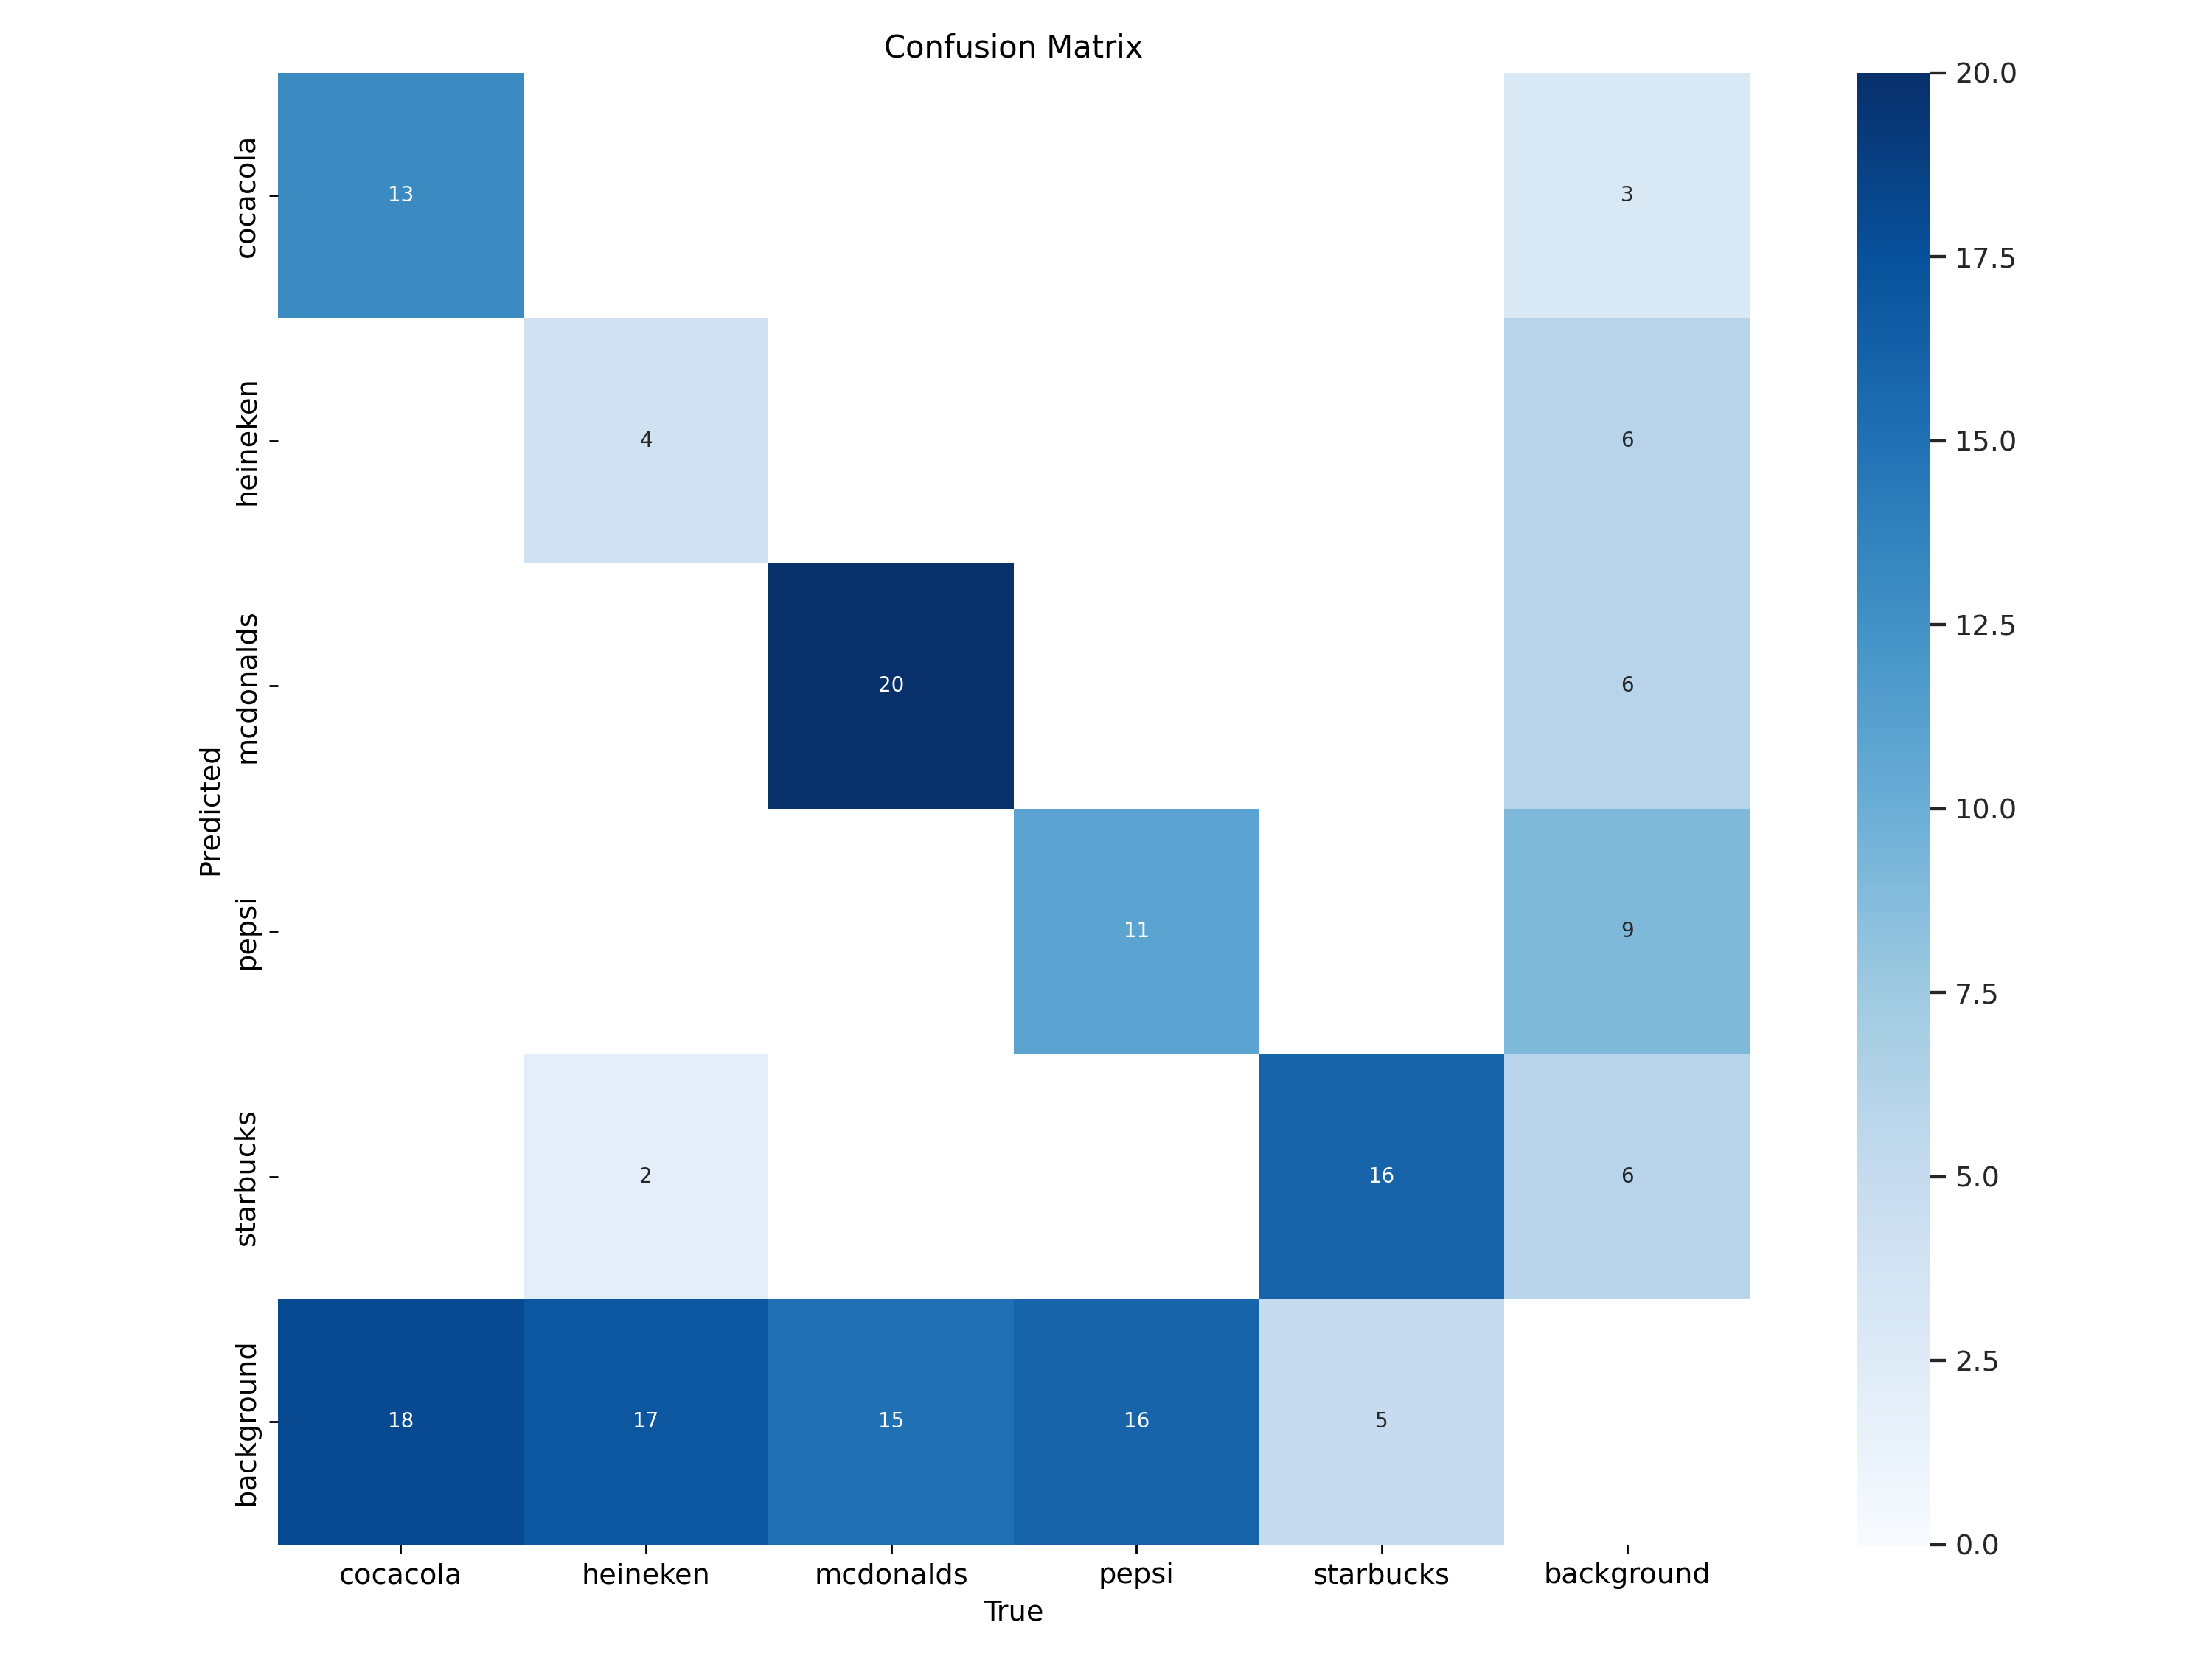

In [17]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

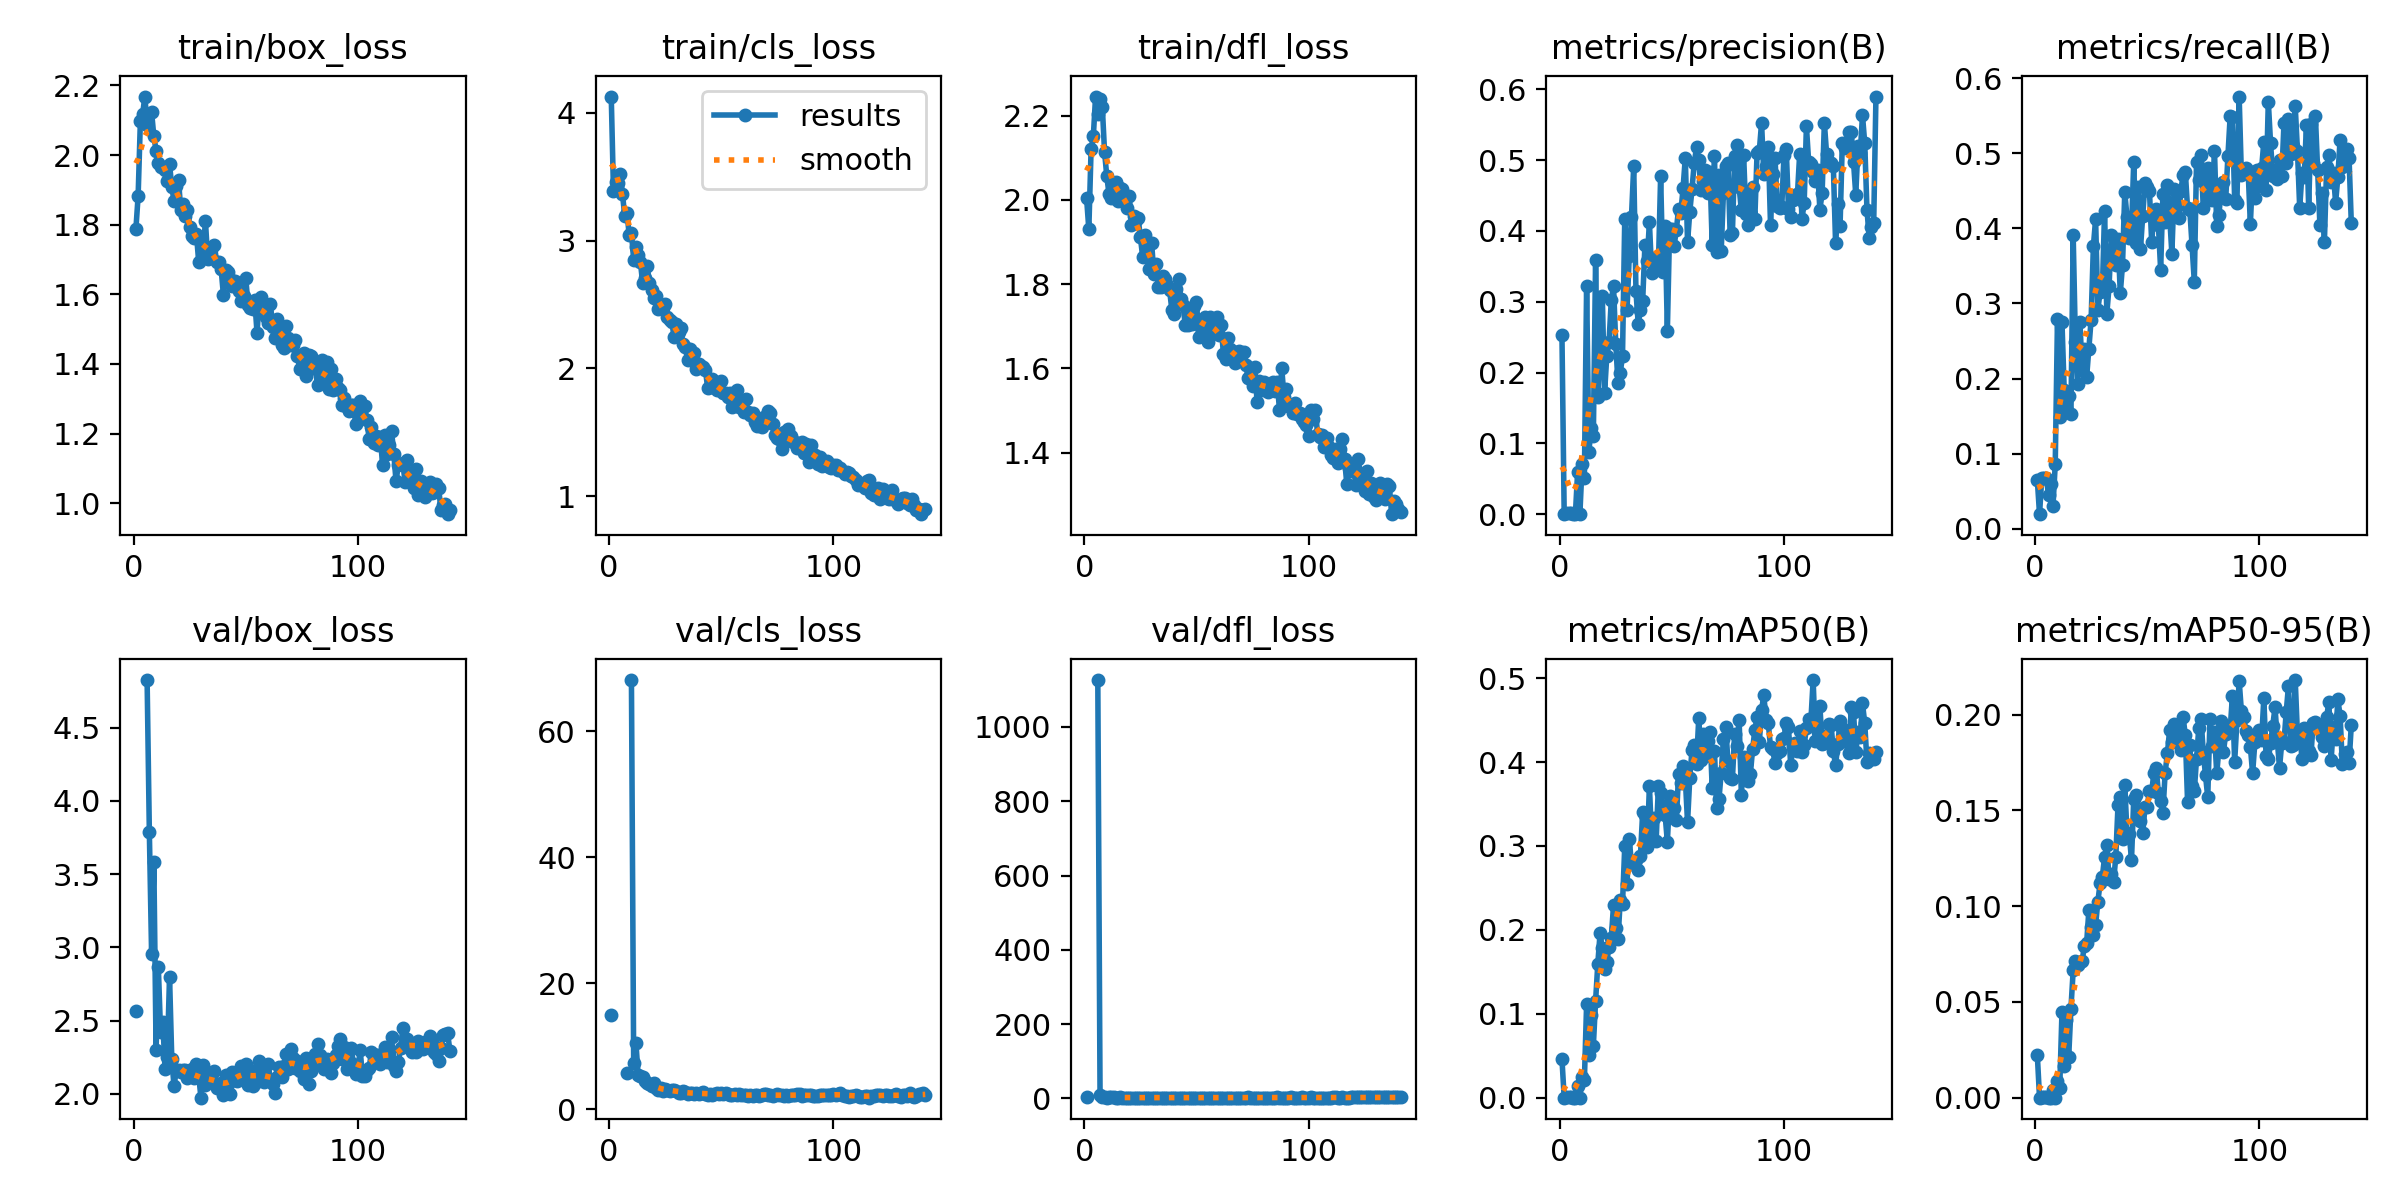

In [18]:
Image(filename='runs/detect/train/results.png', width=600)

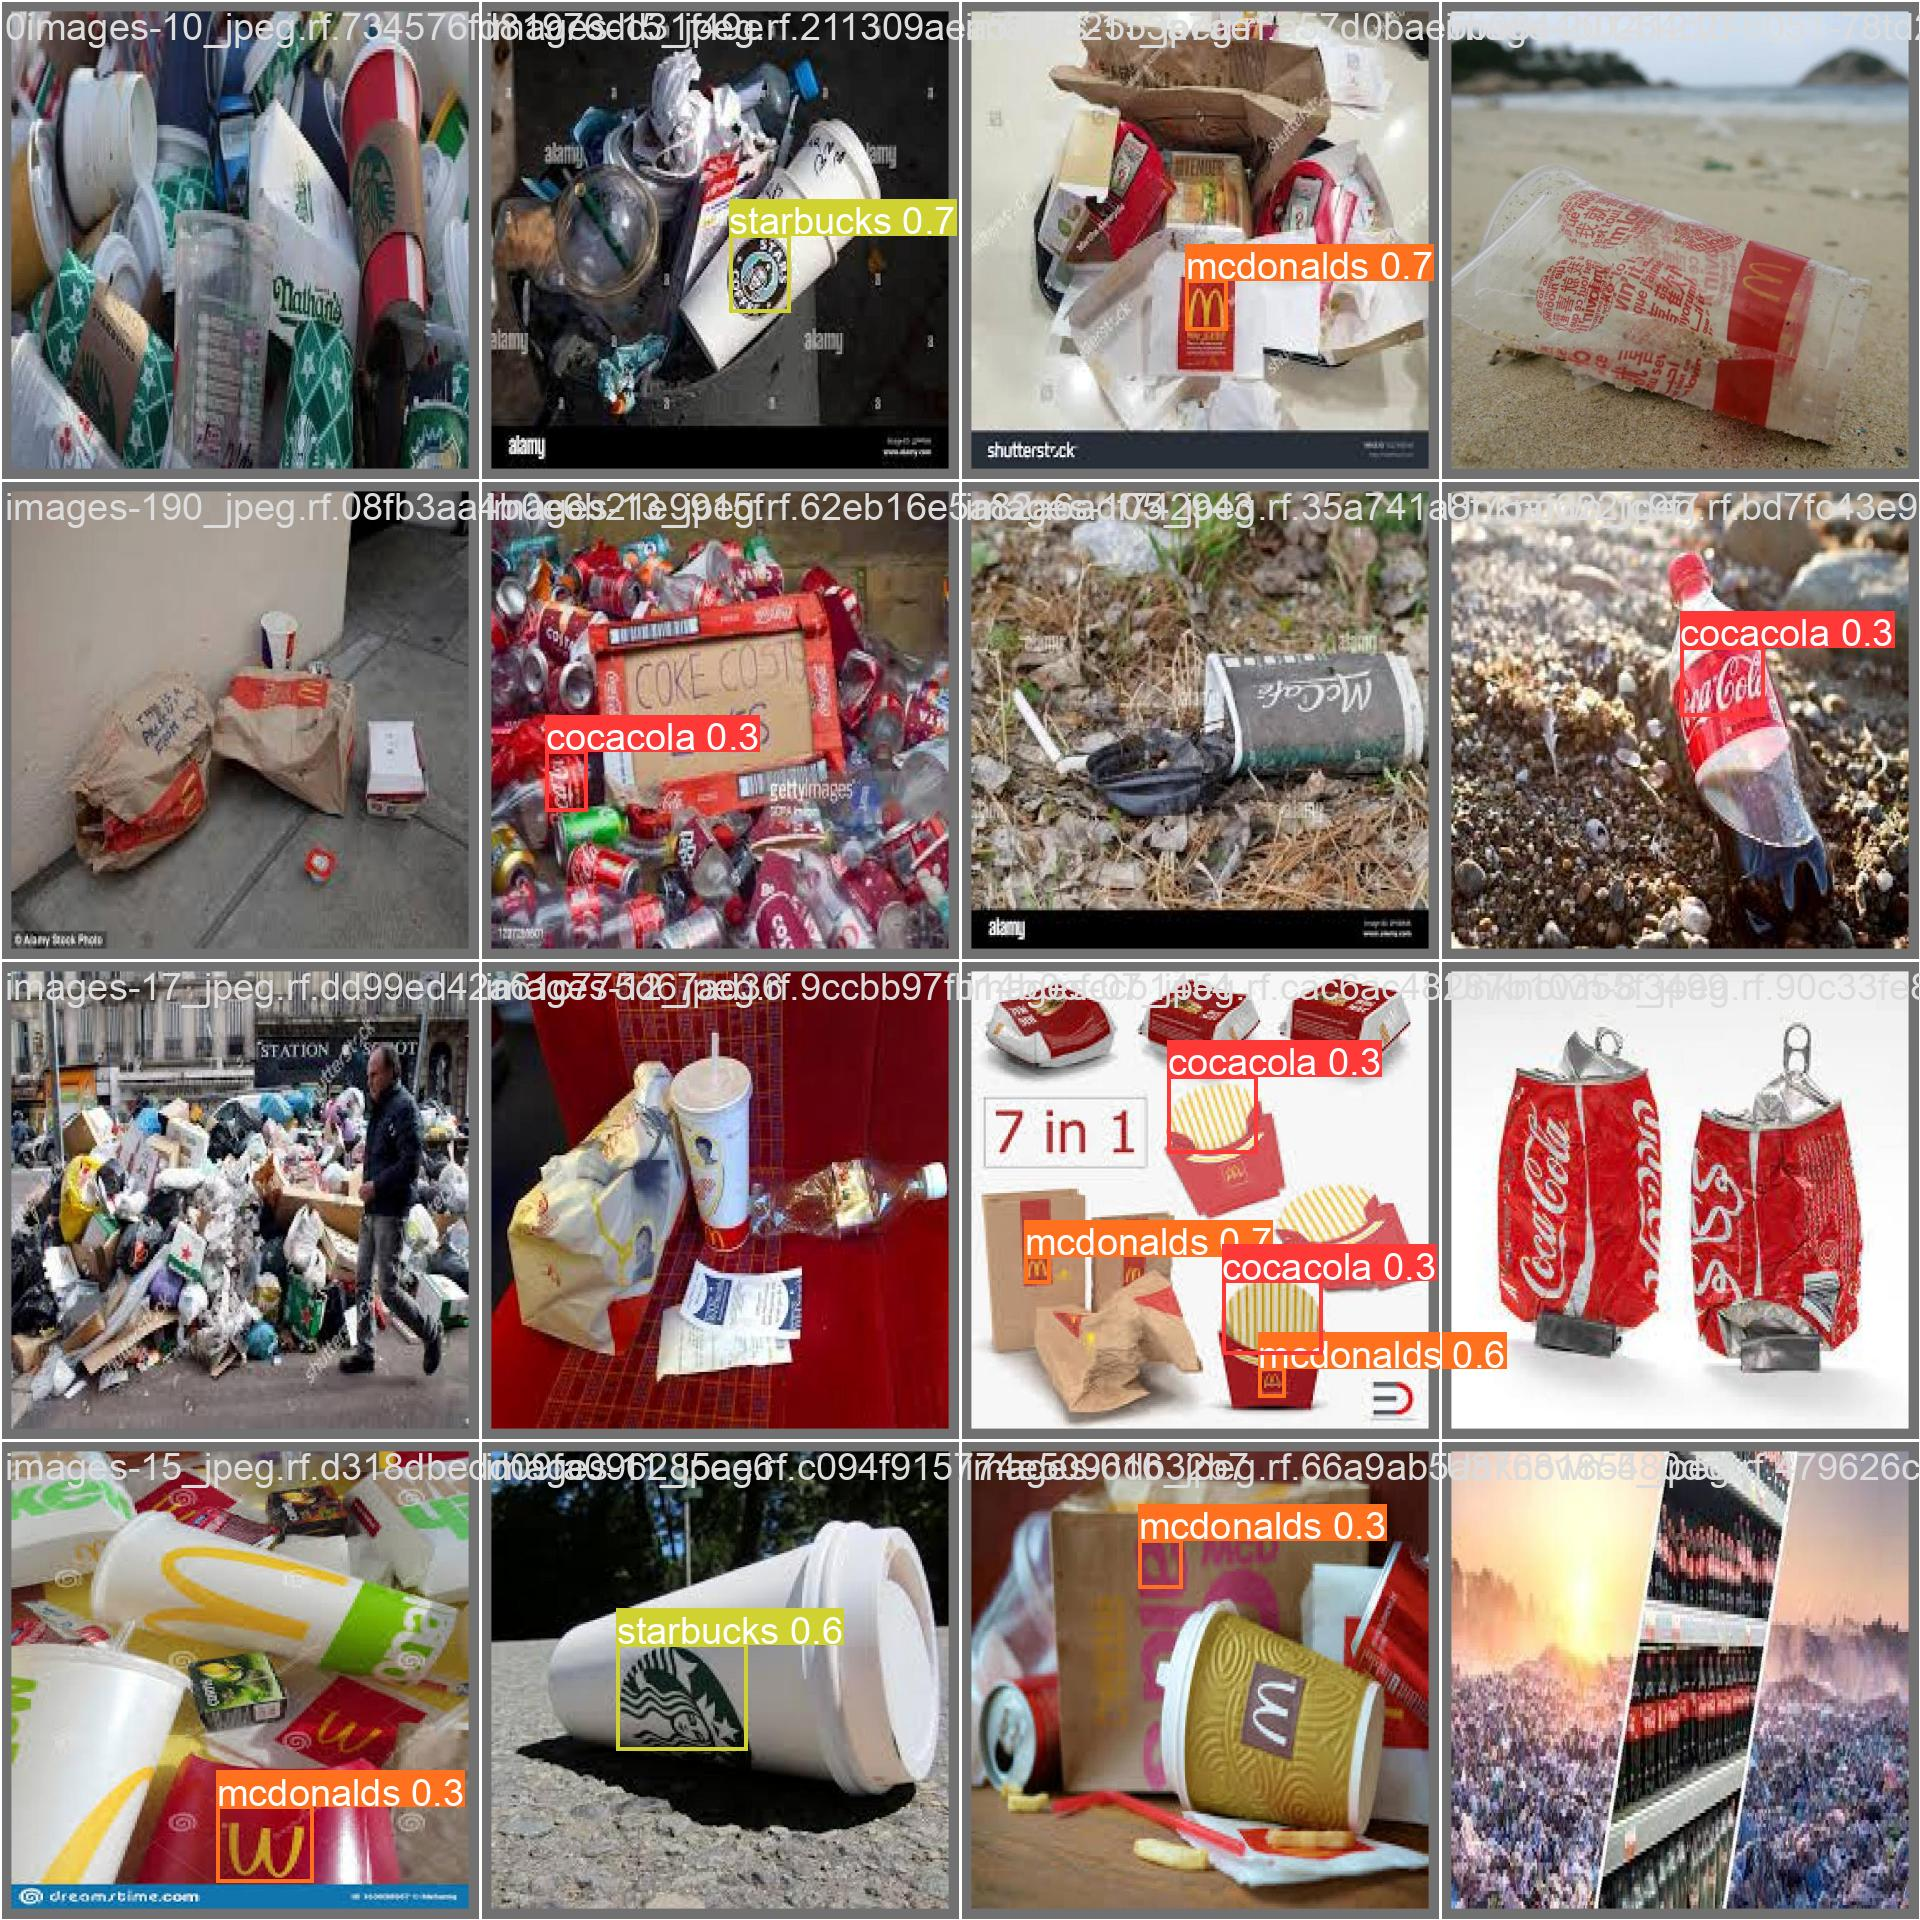

In [19]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
#Copiar los resultados desde colab a una carpeta en Google Drive

!scp -r /content/runs '/content/gdrive/My Drive/yolov8'

In [13]:
#Comprimir resultados a zip para descargar desde colab
#!zip -r /content/runs.zip /content/runs/

# Prediccion video con google drive

In [ ]:
#!yolo detect predict model= /content/runs/detect/train/weights/best.pt conf=0.25 source= '/content/gdrive/My Drive/yolov8/coca-cola-vs-pepsi.mp4'

In [ ]:
#!ffmpeg -i {"/content/runs/detect/predict/coca-cola-vs-pepsi.avi"} -vcodec libx264 {"prediccion.mp4"}

# Subir un archivo video o imagen para analizar con el modelo

Admite formato de video mp4, avi y en formato de imagen jpg, png

El video se guarda como prediccion.mp4 en la raiz del directorio y la imagen se puede ver de manera automatica, ambos se guardan en runs/detect/predictx donde x es la cantidad de veces que se ha corrido el codigo

In [46]:
from google.colab import files

# Cargar la imagen desde el dispositivo local
carga = files.upload()

# Obtener la lista de archivos cargados
nombre_archivo = list(carga.keys())

# Mostrar el nombre del archivo cargado
print("Nombre del archivo cargado:", nombre_archivo[0])

# Obtener la ruta del archivo cargado
ruta_archivo = '/content/' + nombre_archivo[0]

# Mostrar la ruta del archivo
print("Ruta del archivo cargado:", ruta_archivo)


Saving coca-cola-vs-pepsi.mp4 to coca-cola-vs-pepsi.mp4
Nombre del archivo cargado: coca-cola-vs-pepsi.mp4
Ruta del archivo cargado: /content/coca-cola-vs-pepsi.mp4


In [50]:
import os

#Nombres de archivo
extension_archivo = ruta_archivo.split('.')[-1]
archivo_a_mostrar = nombre_archivo[0]
nombre_archivo_sin_extension = nombre_archivo[0].rsplit('.', 1)[0]

# Directorio base
directorio_base = '/content/runs/detect/'

# Encuentra el último número de carpeta creado
ultimo_numero = 0
carpetas_predict = [carpeta for carpeta in os.listdir(directorio_base) if carpeta.startswith('predict') and carpeta[7:].isdigit()]
if carpetas_predict:
    ultimo_numero = max(int(carpeta[7:]) for carpeta in carpetas_predict)

# Incrementar el número para la próxima carpeta
nuevo_numero = ultimo_numero + 1

# Construir la parte final de la ruta
parte_final_ruta = f'predict{nuevo_numero}/'

# Construir la ruta completa del archivo
ruta_completa_imagen = f'{directorio_base}{parte_final_ruta}{archivo_a_mostrar}'

# Construye la ruta completa del archivo
ruta_completa_video = f'{directorio_base}{parte_final_ruta}{nombre_archivo_sin_extension}.avi'

#Dependiendo del formato de archivo generar una prediccion con el modelo entrenado
if extension_archivo.lower() == 'mp4' or extension_archivo.lower() == 'avi':
  !yolo detect predict model= /content/runs/detect/train/weights/best.pt conf=0.25 source= {ruta_archivo}
  !ffmpeg -i {ruta_completa_video} -vcodec libx264 {"prediccion.mp4"}
elif extension_archivo.lower() == 'jpg' or extension_archivo.lower() == 'png':
  !yolo detect predict model= /content/runs/detect/train/weights/best.pt conf=0.45 source= {ruta_archivo}
  display(Image(filename=ruta_completa_imagen, width=600))
else:
    print("El archivo no es un video con extensión MP4, AVI, PNG o JPG.")

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs

video 1/1 (1/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 110.6ms
video 1/1 (2/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 34.2ms
video 1/1 (3/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 34.0ms
video 1/1 (4/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 33.6ms
video 1/1 (5/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 33.6ms
video 1/1 (6/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 33.6ms
video 1/1 (7/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 33.6ms
video 1/1 (8/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 30.2ms
video 1/1 (9/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 21.3ms
video 1/1 (10/896) /content/coca-cola-vs-pepsi.mp4: 640x384 (no detections), 20.4